# Exploratory Data Analysis

In [ ]:
# Import packages needed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
%pip install bioinfokit
%pip install nhanes
%pip install pingouin
import pingouin as pg
from bioinfokit.analys import stat
from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.power import TTestIndPower
from scipy.stats import shapiro, levene
from nhanes.load import load_NHANES_data
import statsmodels.stats.power as smp
from statsmodels.formula.api import mixedlm

In [ ]:
# Import Dataset
df=pd.read_csv("/content/INF2178_A4_data.csv")

# Display initial rows of Dataset
df.head(10)

,Unnamed: 0,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
5,6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
6,7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
7,8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
8,10,OAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,NaN,28.0,0.5,1357,0.748,1.293
9,13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380


In [ ]:
# Display information on dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  294 non-null    int64  
 1   Subject ID  294 non-null    object 
 2   MRI ID      294 non-null    object 
 3   Group       294 non-null    object 
 4   Visit       294 non-null    int64  
 5   MR Delay    294 non-null    int64  
 6   M/F         294 non-null    object 
 7   Hand        294 non-null    object 
 8   Age         294 non-null    int64  
 9   EDUC        294 non-null    int64  
 10  SES         294 non-null    float64
 11  MMSE        294 non-null    float64
 12  CDR         294 non-null    float64
 13  eTIV        294 non-null    int64  
 14  nWBV        294 non-null    float64
 15  ASF         294 non-null    float64
dtypes: float64(5), int64(6), object(5)
memory usage: 36.9+ KB
None


In [ ]:
# Check for NaN values
nan_count = df.isna().sum()
print(nan_count)

Unnamed: 0    0
Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64


In [ ]:
# Identify numeric columns in the dataframe
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Fill missing values in numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [ ]:
# Display summary statistics for numerical columns
print(df.describe())

       Unnamed: 0       Visit     MR Delay         Age        EDUC  \
count  294.000000  294.000000   294.000000  294.000000  294.000000   
mean   190.421769    1.489796   349.785714   76.411565   14.561224   
std    106.686740    0.500748   400.741520    7.607074    2.884818   
min      0.000000    1.000000     0.000000   60.000000    6.000000   
25%     99.000000    1.000000     0.000000   71.000000   12.000000   
50%    195.500000    1.000000     0.000000   76.000000   14.500000   
75%    282.750000    2.000000   671.500000   81.000000   16.000000   
max    371.000000    2.000000  1707.000000   98.000000   23.000000   

              SES        MMSE         CDR         eTIV        nWBV         ASF  
count  294.000000  294.000000  294.000000   294.000000  294.000000  294.000000  
mean     2.491039   27.259386    0.301020  1478.853741    0.731381    1.203109  
std      1.098754    3.407624    0.381347   176.559755    0.037373    0.139365  
min      1.000000   15.000000    0.000000  11

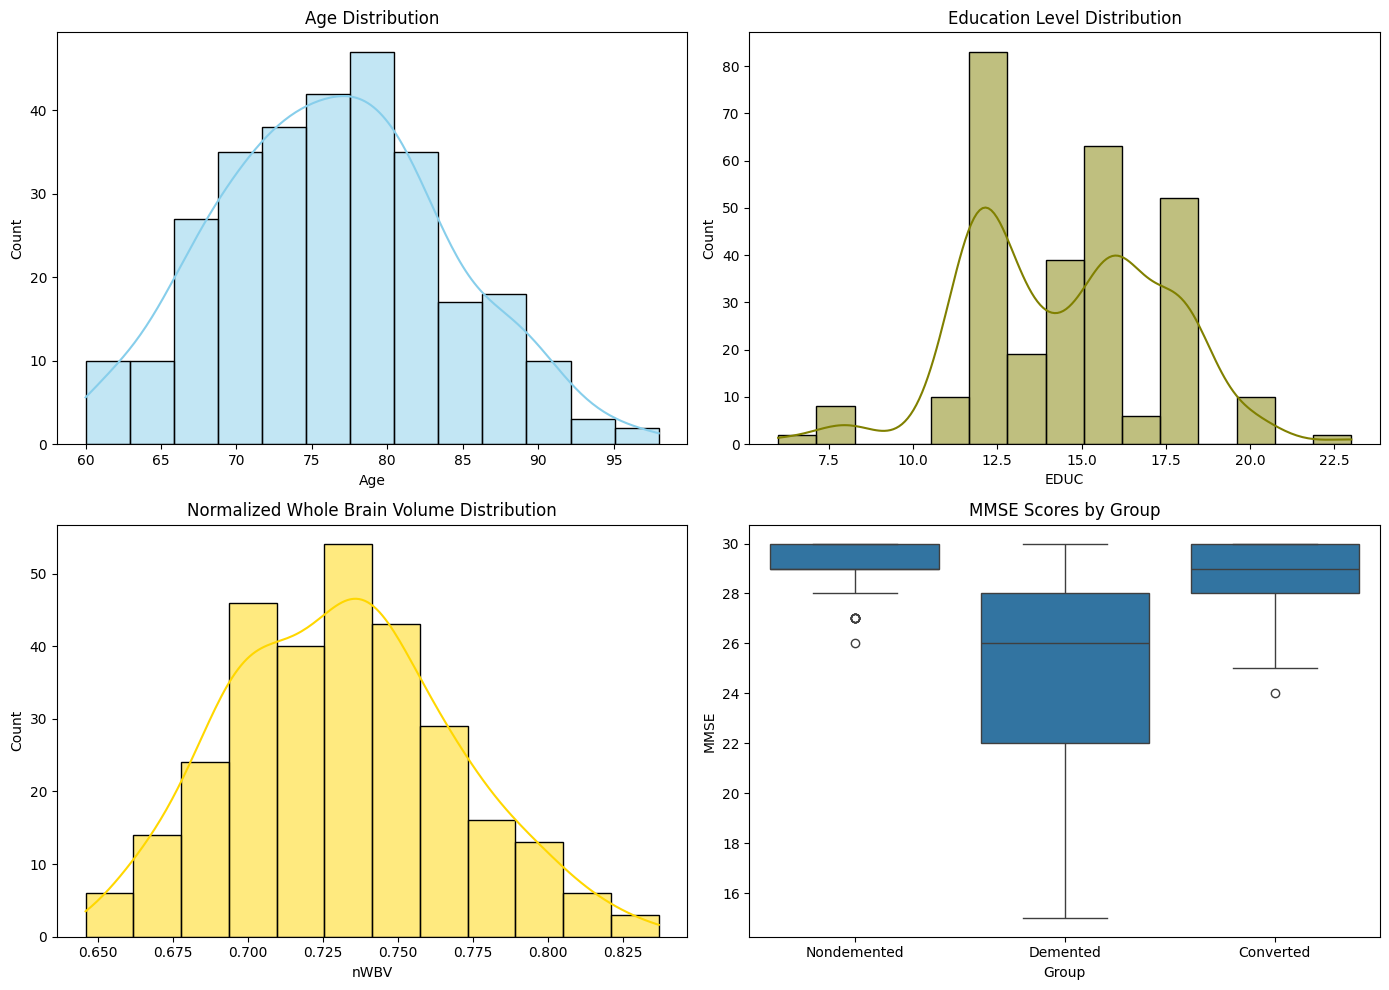

In [ ]:
# EDA: Distribution of key variables
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Distribution of Age
sns.histplot(data=df, x="Age", kde=True, ax=axs[0, 0], color="skyblue")
axs[0, 0].set_title("Age Distribution")

# Distribution of EDUC (Years of Education)
sns.histplot(data=df, x="EDUC", kde=True, ax=axs[0, 1], color="olive")
axs[0, 1].set_title("Education Level Distribution")

# Distribution of nWBV (Normalized Whole Brain Volume)
sns.histplot(data=df, x="nWBV", kde=True, ax=axs[1, 0], color="gold")
axs[1, 0].set_title("Normalized Whole Brain Volume Distribution")

# MMSE scores by Group
sns.boxplot(data=df, x="Group", y="MMSE", ax=axs[1, 1])
axs[1, 1].set_title("MMSE Scores by Group")
plt.tight_layout()
plt.show()

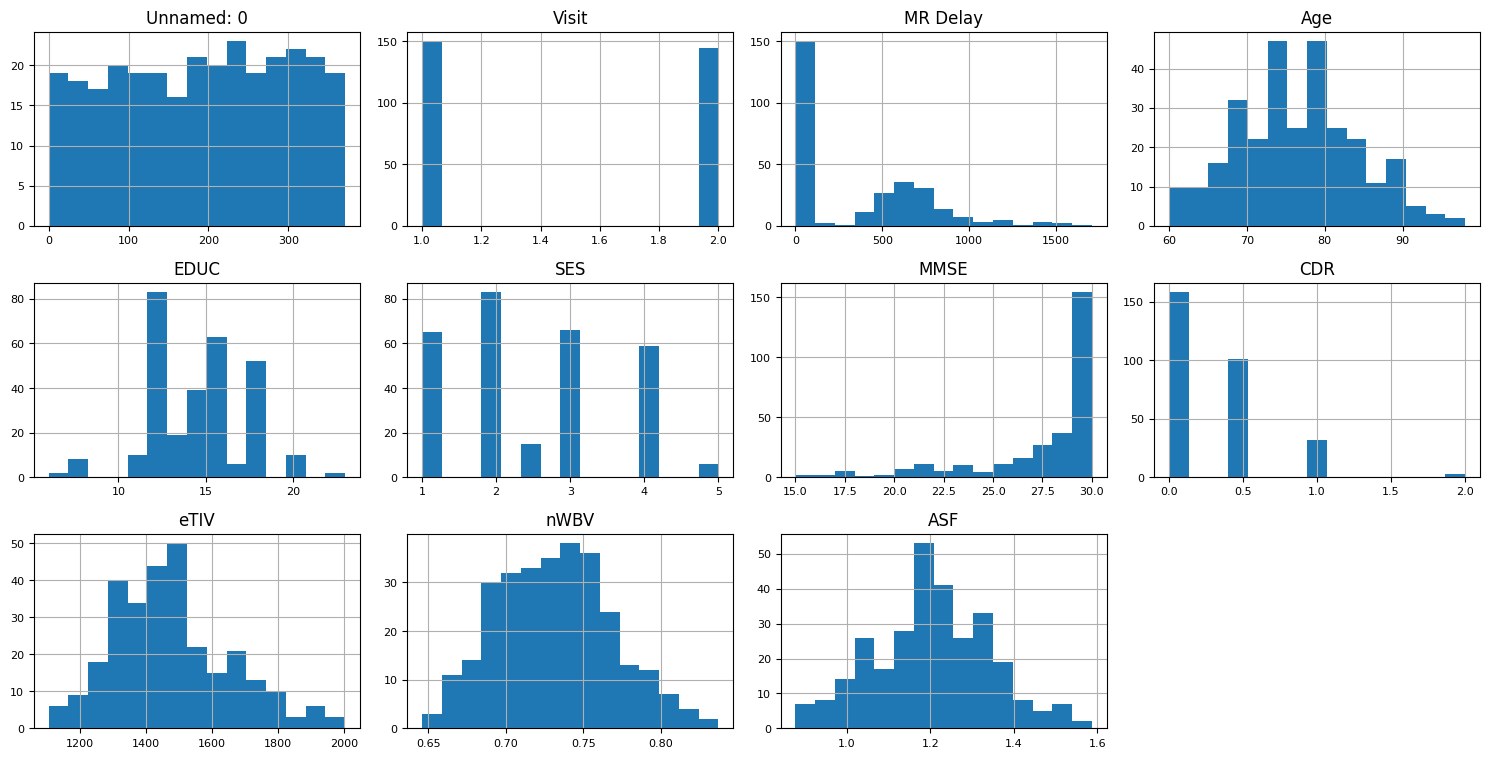

In [ ]:
# Histograms for numerical data
df.hist(bins=15, figsize=(15, 10), layout=(4, 4), xlabelsize=8, ylabelsize=8)
plt.tight_layout()
plt.show()

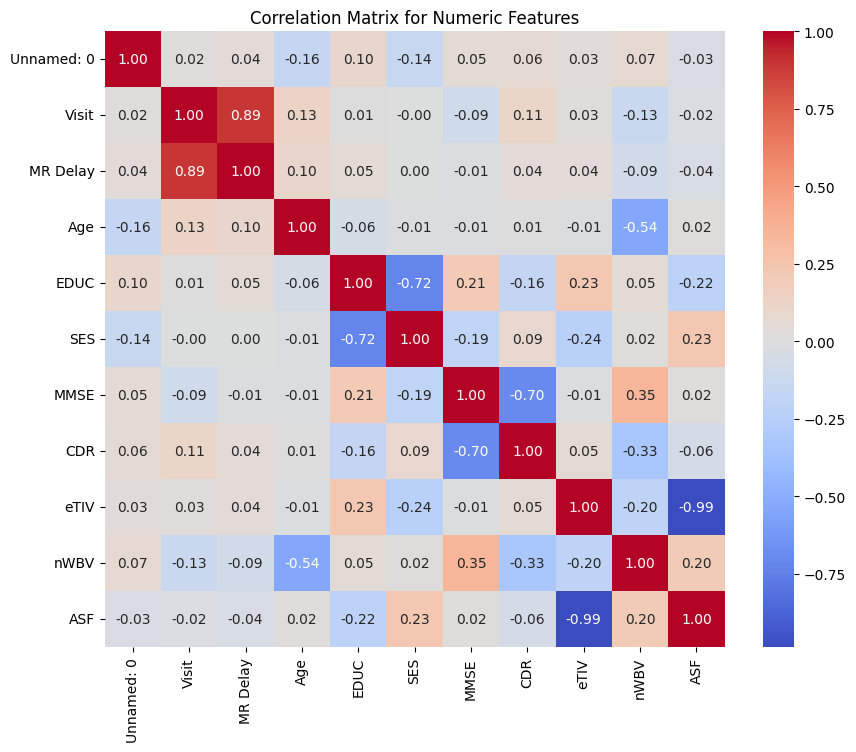

In [ ]:
plt.figure(figsize=(10, 8))

# Correlation Matrix
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.show()

In [ ]:
# Count the number of unique patients for each group
group_count = df.groupby("Group")["Subject ID"].nunique()
group_count

Group
Converted      14
Demented       64
Nondemented    72
Name: Subject ID, dtype: int64

In [ ]:
# Count the number of patients by group and visit
grouped_data = df.groupby(["Group", "Visit"])["Subject ID"].nunique().reset_index()
grouped_data

,Group,Visit,Subject ID
0,Converted,1,14
1,Converted,2,12
2,Demented,1,64
3,Demented,2,62
4,Nondemented,1,72
5,Nondemented,2,70


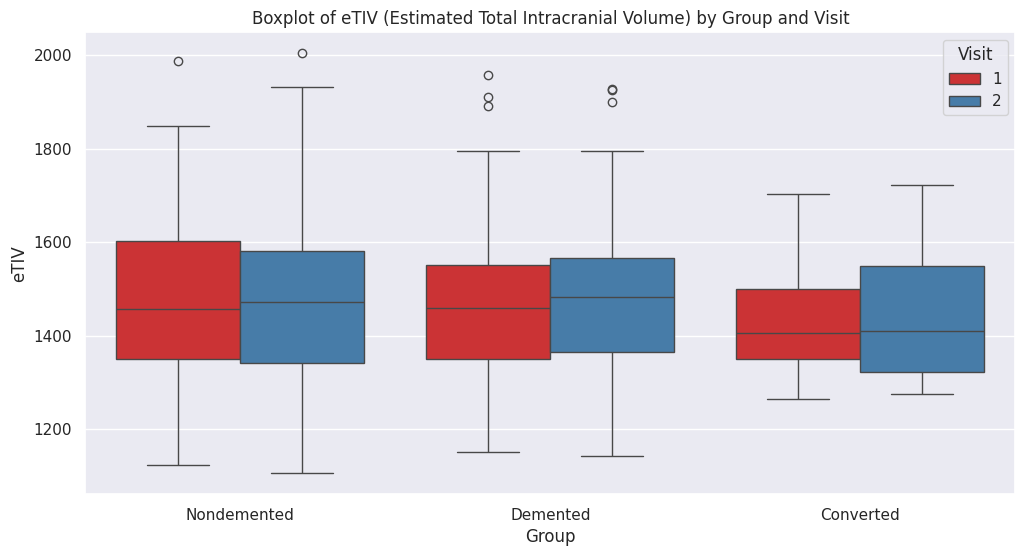

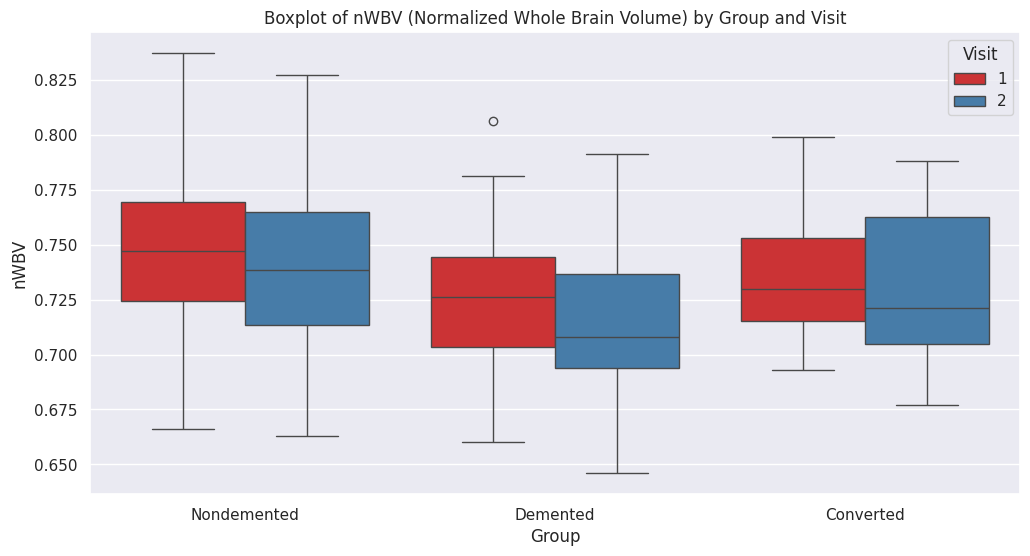

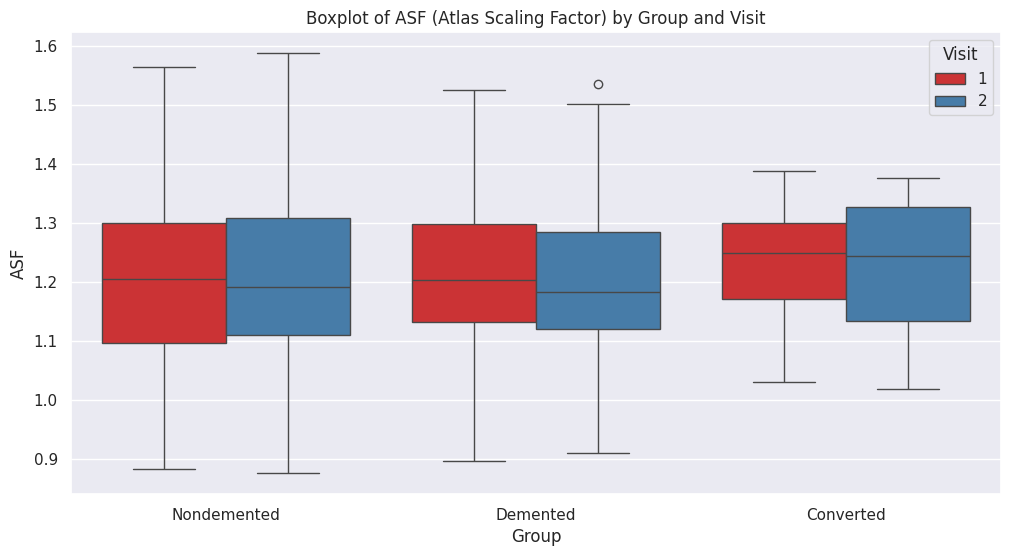

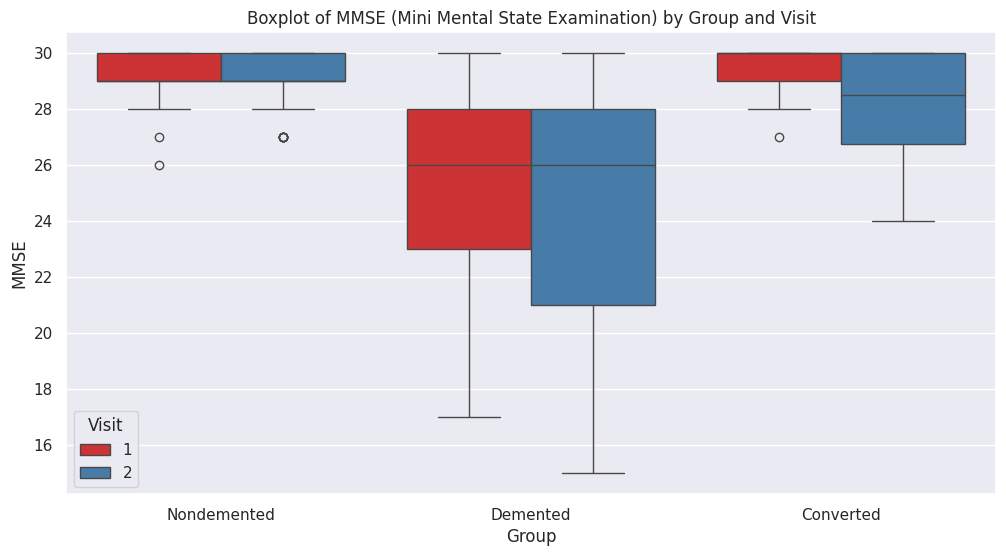

In [ ]:
def create_boxplot(data, y_var, title, palette="Set1"):
    plt.figure(figsize=(12, 6))
    sns.boxplot(x="Group", y=y_var, hue="Visit", data=data, palette=palette)
    plt.xlabel("Group")
    plt.ylabel(y_var)
    plt.title(title)
    plt.show()

create_boxplot(df, 'eTIV', 'Boxplot of eTIV (Estimated Total Intracranial Volume) by Group and Visit')
create_boxplot(df, 'nWBV', 'Boxplot of nWBV (Normalized Whole Brain Volume) by Group and Visit')
create_boxplot(df, 'ASF', 'Boxplot of ASF (Atlas Scaling Factor) by Group and Visit')
create_boxplot(df, 'MMSE', 'Boxplot of MMSE (Mini Mental State Examination) by Group and Visit')

# Mixed Effects ANOVA

In [ ]:
# List of dependent variables
dependent_variables = ['MMSE', 'eTIV', 'nWBV', 'ASF']

# Mixed-effects ANOVA and assumption checks for each dependent variable
for dv in dependent_variables:
    print(f"--- Mixed-Effect ANOVA and Assumption Checks for: {dv} ---")

    # Mixed-effect ANOVA
    anova_results = pg.mixed_anova(dv=dv, within='Visit', between='Group', subject='Subject ID', data=df)
    print(anova_results, "\n")

    # Combined factor for normality check
    df['factor_comb'] = df['Group'] + "-" + df['Visit'].astype(str)

    # Normality
    normality_tests = pg.normality(data=df, dv=dv, group='factor_comb')
    print("Normality Test Results:")
    print(normality_tests, "\n")

    # Check for homogeneity of variances for each level of Visit
    for visit in df['Visit'].unique():
        homogeneity_test = pg.homoscedasticity(data=df[df['Visit'] == visit], dv=dv, group='Group')
        print(f"Homogeneity of Variances Test Results for Visit {visit}:")
        print(homogeneity_test, "\n")

--- Mixed-Effect ANOVA and Assumption Checks for: MMSE ---
        Source           SS  DF1  DF2          MS          F         p-unc  \
0        Group  1322.017257    2  141  661.008629  56.099884  1.190651e-18   
1        Visit    21.528071    1  141   21.528071   8.525110  4.079309e-03   
2  Interaction    16.204091    2  141    8.102046   3.208408  4.338925e-02   

        np2  eps  
0  0.443127  NaN  
1  0.057015  1.0  
2  0.043528  NaN   

Normality Test Results:
                      W          pval  normal
factor_comb                                  
Nondemented-1  0.798251  1.539872e-08   False
Nondemented-2  0.805280  3.312041e-08   False
Demented-1     0.948788  9.978835e-03   False
Demented-2     0.901042  1.119963e-04   False
Converted-1    0.730432  7.777334e-04   False
Converted-2    0.876154  7.826246e-02    True 

Homogeneity of Variances Test Results for Visit 1:
               W          pval  equal_var
levene  36.89391  1.036701e-13      False 

Homogeneity of Vari

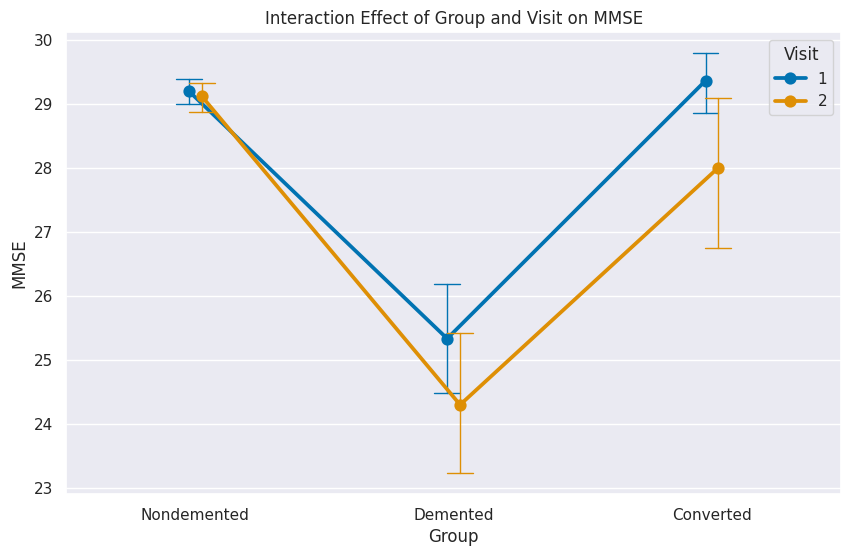

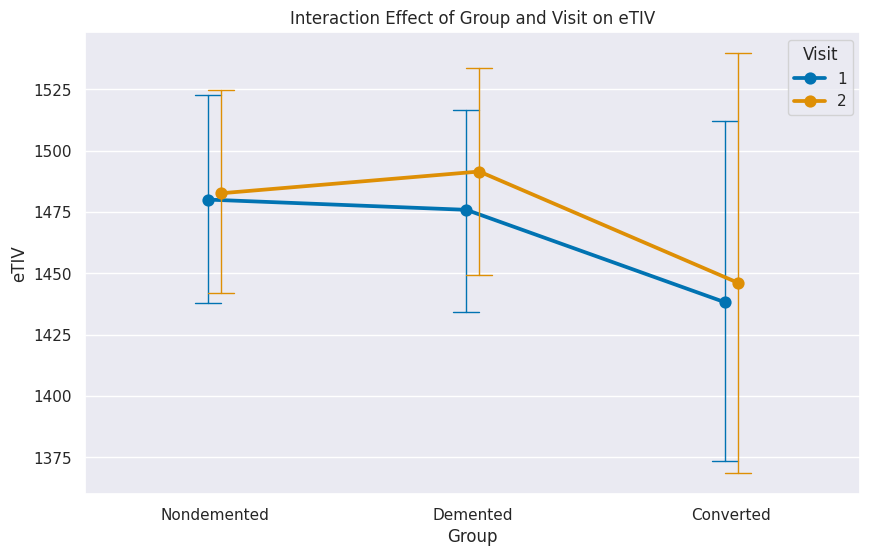

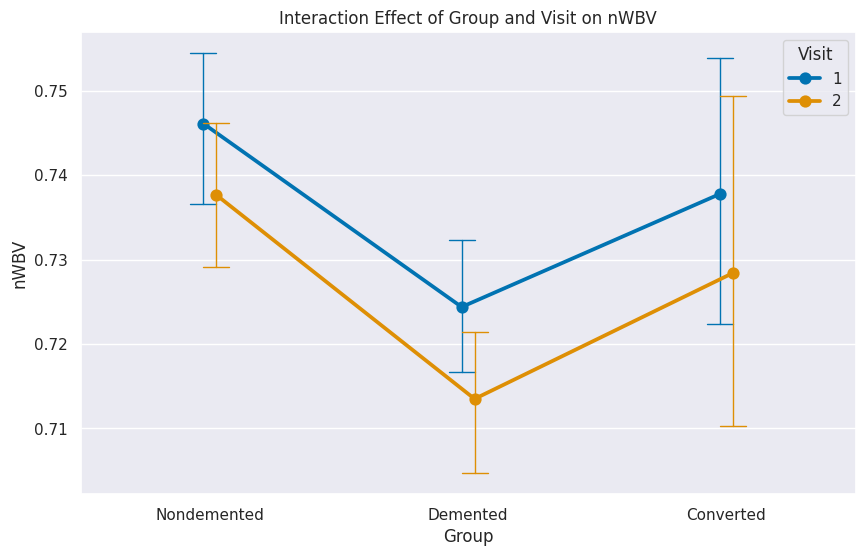

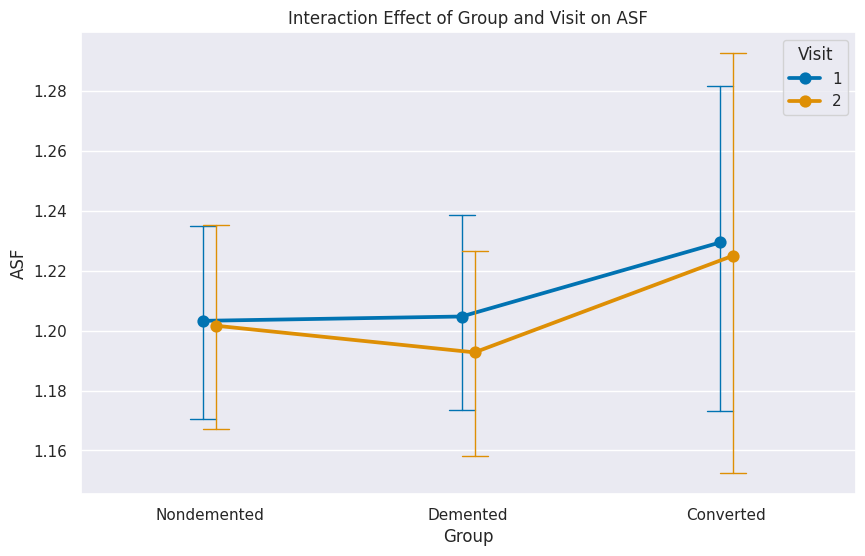

In [ ]:
sns.set()
for dv in dependent_variables:
    plt.figure(figsize=(10, 6))
    sns.pointplot(data=df, x='Group', y=dv, hue='Visit', dodge=True,
                  capsize=.1, err_kws={'linewidth': 1}, palette='colorblind')
    plt.title(f'Interaction Effect of Group and Visit on {dv}')
    plt.show()

# Statistical Power Analysis

Required sample size (per group): 45.45


<Figure size 1000x600 with 0 Axes>

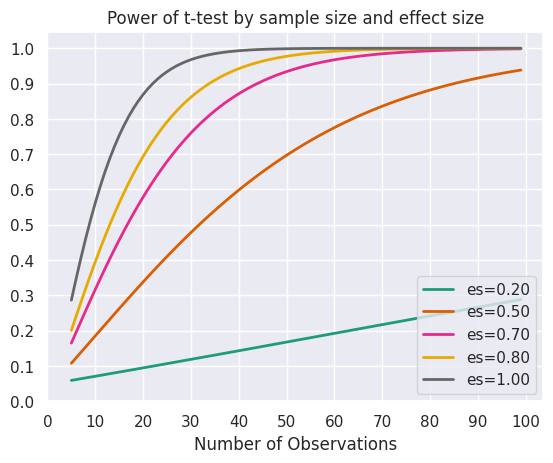

In [ ]:
# Parameters for power analysis
effect_size = 0.7
alpha = 0.05
power = 0.91

# Create TTestIndPower instance
analysis = TTestIndPower()

# Determine sample size
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')
print(f'Required sample size (per group): {sample_size:.2f}')

# Generate and plot power curve
effect_sizes = np.array([0.2, 0.5, 0.7, 0.8, 1.0])
sample_sizes = np.array(range(5, 100))

plt.figure(figsize=(10, 6))
analysis.plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes)
plt.title('Power of t-test by sample size and effect size')
plt.xticks(np.arange(0, 101, 10))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.show()